## Dependencies

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import datasets

## Accident Dataframe

In [102]:
location="Resources/US_Accidents_June20.csv"
df=pd.read_csv(location)
df.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


#### Data Manipulation

In [103]:
df["Day_Number"]=""
df["Holiday"]=""

df[['Date','Time']] = df.Start_Time.str.split(expand=True)
df["Time"]=pd.to_datetime(df["Time"], format='%H:%M').dt.hour

bins=[0,5.9,10.9,15.9,19.9,23.9]
period=["Midnight","Morning","Afternoon","Evening","Night"]
df["Day_Period"] = pd.cut(df["Time"], bins, labels=period, include_lowest=True)

In [104]:
delete_column_list=['Source', 'TMC','Start_Time','End_Time', 'End_Lat', 'End_Lng','Distance(mi)','Description', 'Number','Side',
                    'Timezone', 'Airport_Code','Weather_Timestamp','Wind_Chill(F)','Pressure(in)',
                    'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)','Precipitation(in)','Amenity', 
                    'Bump', 'Crossing','Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
                    'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop','Sunrise_Sunset', 'Civil_Twilight', 
                    'Nautical_Twilight','Astronomical_Twilight']
for column in delete_column_list:
    del df[column]
    
df.head(5)    

,ID,Severity,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Country,Temperature(F),Humidity(%),Weather_Condition,Day_Number,Holiday,Date,Time,Day_Period
0,A-1,3,39.865147,-84.058723,I-70 E,Dayton,Montgomery,OH,45424,US,36.9,91.0,Light Rain,,,2/8/2016,5,Midnight
1,A-2,2,39.928059,-82.831184,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,37.9,100.0,Light Rain,,,2/8/2016,6,Morning
2,A-3,2,39.063148,-84.032608,State Route 32,Williamsburg,Clermont,OH,45176,US,36.0,100.0,Overcast,,,2/8/2016,6,Morning
3,A-4,3,39.747753,-84.205582,I-75 S,Dayton,Montgomery,OH,45417,US,35.1,96.0,Mostly Cloudy,,,2/8/2016,7,Morning
4,A-5,2,39.627781,-84.188354,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,36.0,89.0,Mostly Cloudy,,,2/8/2016,7,Morning


In [105]:
df=df.rename(columns={
    "Start_Lat":"Latitude",
    "Start_Lng":"Longtitude",
    "Temperature(F)":"Temperature"
})
df=pd.merge(df,calender_df,on="Date",how='inner')

In [106]:
accident_df=df[["ID","Date","Day_Period","Time","Holiday","Day_Number","Severity","Street","City","County","State",
                "Zipcode","Latitude","Longtitude","Weather_Condition","Temperature"]]

accident_df.head(5)


,ID,Date,Day_Period,Time,Holiday,Day_Number,Severity,Street,City,County,State,Zipcode,Latitude,Longtitude,Weather_Condition,Temperature
0,A-1,2/8/2016,Midnight,5,,,3,I-70 E,Dayton,Montgomery,OH,45424,39.865147,-84.058723,Light Rain,36.9
1,A-2,2/8/2016,Morning,6,,,2,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,39.928059,-82.831184,Light Rain,37.9
2,A-3,2/8/2016,Morning,6,,,2,State Route 32,Williamsburg,Clermont,OH,45176,39.063148,-84.032608,Overcast,36.0
3,A-4,2/8/2016,Morning,7,,,3,I-75 S,Dayton,Montgomery,OH,45417,39.747753,-84.205582,Mostly Cloudy,35.1
4,A-5,2/8/2016,Morning,7,,,2,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,39.627781,-84.188354,Mostly Cloudy,36.0


## Independence Day DataFrame

In [107]:
accident_df.loc[accident_df["Date"]=="7/2/2016",["Day_Number"]]="1st_Day"
accident_df.loc[accident_df["Date"]=="7/3/2016",["Day_Number"]]="2nd_Day"
accident_df.loc[accident_df["Date"]=="7/4/2016",["Day_Number"]]="3rd_Day"
accident_df.loc[accident_df["Date"]=="7/5/2016",["Day_Number"]]="4th_Day"

accident_df.loc[(accident_df["Date"]=="7/2/2016")|(accident_df["Date"]=="7/3/2016")|
                (accident_df["Date"]=="7/4/2016")|(accident_df["Date"]=="7/5/2016"),
           "Holiday"]="Independence_Day"

independence_df=accident_df.loc[accident_df["Holiday"]=="Independence_Day",
                                ["ID","Holiday","Day_Number","Day_Period","Severity",
                                 "Latitude","Longtitude","Street","City","Zipcode",
                                 "State","Date","Time","Weather_Condition","Temperature"]]

independence_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,Holiday,Day_Number,Day_Period,Severity,Latitude,Longtitude,Street,City,Zipcode,State,Date,Time,Weather_Condition,Temperature
1906,A-1907,Independence_Day,1st_Day,Morning,2,37.840397,-122.023911,Danville Blvd,Alamo,94507-2106,CA,7/2/2016,9,Clear,73.0
1907,A-1908,Independence_Day,1st_Day,Morning,3,37.708939,-121.723686,I-580 E,Livermore,94551,CA,7/2/2016,9,Clear,73.0
1908,A-1909,Independence_Day,1st_Day,Morning,2,37.743294,-121.343498,I-5 N,Tracy,95304,CA,7/2/2016,7,Clear,68.0
1909,A-1910,Independence_Day,1st_Day,Morning,2,38.021015,-121.329979,W Hammer Ln,Stockton,95209-3013,CA,7/2/2016,10,Clear,81.0
1910,A-1911,Independence_Day,1st_Day,Morning,2,37.821934,-121.291641,I-5 N,Lathrop,95330,CA,7/2/2016,10,Clear,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,A-2215,Independence_Day,4th_Day,Night,3,37.987347,-121.344704,I-5 S,Stockton,95219,CA,7/5/2016,22,Clear,66.0
2215,A-2216,Independence_Day,4th_Day,Night,2,38.529095,-121.470215,26th Ave,Sacramento,95820,CA,7/5/2016,23,Clear,57.9
2216,A-2217,Independence_Day,4th_Day,Night,2,39.447063,-123.385353,Lupine Dr,Willits,95490-8035,CA,7/5/2016,23,Clear,66.0
2217,A-2218,Independence_Day,4th_Day,Night,2,37.807072,-122.475616,Golden Gate Brg S,San Francisco,94129,CA,7/5/2016,23,Partly Cloudy,57.0


## Christmast DataFrame

In [108]:
accident_df.loc[accident_df["Date"]=="12/23/2016",["Day_Number"]]="1st_Day"
accident_df.loc[accident_df["Date"]=="12/24/2016",["Day_Number"]]="2nd_Day"
accident_df.loc[accident_df["Date"]=="12/25/2016",["Day_Number"]]="3rd_Day"
accident_df.loc[accident_df["Date"]=="12/26/2016",["Day_Number"]]="4th_Day" 

accident_df.loc[(accident_df["Date"]=="12/23/2016")|(accident_df["Date"]=="12/24/2016")|
                (accident_df["Date"]=="12/25/2016")|(accident_df["Date"]=="12/26/2016"),"Holiday"]="Christmast"

christmast_df=accident_df.loc[accident_df["Holiday"]=="Christmast",
                                ["ID","Holiday","Day_Number","Day_Period","Severity",
                                 "Latitude","Longtitude","Street","City","Zipcode",
                                 "State","Date","Time","Weather_Condition","Temperature"]]
christmast_df.to_csv("Resources/christmast.csv", index=False, header=True)
christmast_df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ID,Holiday,Day_Number,Day_Period,Severity,Latitude,Longtitude,Street,City,Zipcode,State,Date,Time,Weather_Condition,Temperature
8274,A-8275,Christmast,1st_Day,Midnight,3,37.604694,-121.342896,I-5 S,Tracy,95304,CA,12/23/2016,0,Clear,45.0
8275,A-8276,Christmast,1st_Day,Midnight,3,37.582081,-121.322411,Westside Fwy S,Patterson,95363,CA,12/23/2016,0,Clear,42.1
8276,A-8277,Christmast,1st_Day,Midnight,3,38.240532,-122.090614,I-80 E,Fairfield,94534,CA,12/23/2016,0,Mostly Cloudy,44.1
8277,A-8278,Christmast,1st_Day,Midnight,3,38.575710,-121.508430,I-5 S,Sacramento,95814,CA,12/23/2016,0,Clear,46.9
8278,A-8279,Christmast,1st_Day,Midnight,3,37.546234,-122.022675,Nimitz Fwy S,Newark,94560,CA,12/23/2016,1,Rain,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,A-8656,Christmast,4th_Day,Night,3,37.770020,-121.328255,I-205 W,Tracy,95304,CA,12/26/2016,22,Clear,33.1
8656,A-8657,Christmast,4th_Day,Night,2,37.773006,-121.177032,CA-99 N,Ripon,95366,CA,12/26/2016,22,Clear,39.0
8657,A-8658,Christmast,4th_Day,Night,2,38.505619,-121.455971,CA-99 N,Sacramento,95823,CA,12/26/2016,22,Clear,34.0
8658,A-8659,Christmast,4th_Day,Night,2,37.056732,-120.975060,Highway 152,Los Banos,93635,CA,12/26/2016,22,Clear,33.1


## Functions for Day Periods Analysis

In [109]:
def accident_day_periods(holiday_df,nth_Day):
    m=holiday_df.loc[holiday_df["Day_Number"]==nth_Day,
                                        ["Day_Number","Day_Period"]].groupby(["Day_Period"]).count()
    m=m.reset_index(drop=False)
    m=m.rename(columns={
        "Day_Period":"Time",
        "Day_Number":"Total Accident"})
    
    p=m["Time"].tolist()
    c=m["Total Accident"].tolist()
    t=[]
    periods=["Midnight","Morning","Afternoon","Evening","Night"]
    
    for i in periods:
        if i in p:
            index=p.index(i)
            t.append(c[index])
        else:
            t.append(0)
    return t

In [110]:
def create_dataframe(list1,list2,list3,list4):
    day_list=[]
    day_list.append(list1)
    day_list.append(list2)
    day_list.append(list3)
    day_list.append(list4)
    periods=["Midnight","Morning","Afternoon","Evening","Night"]
    df = pd.DataFrame(day_list, columns =periods, dtype = float)
    df["Days"]=["1st_Day","2nd_Day","3rd_Day","4th_Days"]
    df["Total"]=df["Midnight"]+df["Morning"]+df["Afternoon"]+df["Evening"]+df["Night"]
    df=df[["Days","Midnight","Morning","Afternoon","Evening","Night","Total"]]
    
    return df

In [111]:
def plot_holiday_periods(day1,day2,day3,day4):
    periods=["Midnight","Morning","Afternoon","Evening","Night"]
    plt.bar([a for a in periods], day1, width= -0.25, label = '1st Day', align='edge')
    plt.bar([a for a in periods], day2, width= -0.10, label = '2nd Day', align='edge')
    plt.bar([a for a in periods], day3, width= 0.25, label = '3rd Day', align='edge')
    plt.bar([a for a in periods], day4, width= 0.10, label = '4th Day', align='edge')
    
    plt.title('Accident')
    plt.xlabel('Day Periods')
    plt.ylabel('Accident Numbers')
    plt.legend(loc='upper right')
    plt.xticks(periods)
    plt.grid(True, linewidth= 1, linestyle="--")
    
    return plt.show()

 #### Independence Season Day Period 

In [112]:
create_dataframe(accident_day_periods(independence_df,"1st_Day"),
                accident_day_periods(independence_df,"2nd_Day"),
                 accident_day_periods(independence_df,"3rd_Day"),
                 accident_day_periods(independence_df,"4th_Day"))

,Days,Midnight,Morning,Afternoon,Evening,Night,Total
0,1st_Day,0.0,16.0,11.0,9.0,6.0,42.0
1,2nd_Day,13.0,10.0,24.0,12.0,14.0,73.0
2,3rd_Day,13.0,15.0,20.0,13.0,16.0,77.0
3,4th_Days,27.0,23.0,33.0,21.0,17.0,121.0


In [113]:
hp=[]  ### list variable to hold total accident numbers by day periods

In [114]:
df_int=create_dataframe(accident_day_periods(independence_df,"1st_Day"),
                accident_day_periods(independence_df,"2nd_Day"),
                 accident_day_periods(independence_df,"3rd_Day"),
                 accident_day_periods(independence_df,"4th_Day"))

df_int_sum=df_int[["Midnight","Morning","Afternoon","Evening","Night"]].sum()
list_int_sum=df_int_sum.tolist()
hp.append(list_int_sum)
list_int_sum

[53.0, 64.0, 88.0, 55.0, 53.0]

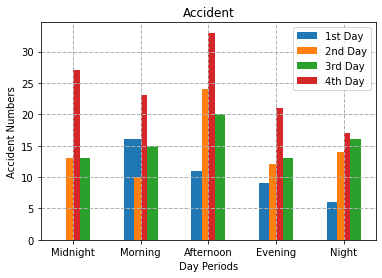

In [115]:
plot_holiday_periods(accident_day_periods(independence_df,"1st_Day"),
                     accident_day_periods(independence_df,"2nd_Day"),
                     accident_day_periods(independence_df,"3rd_Day"),
                     accident_day_periods(independence_df,"4th_Day"))

#### Christmas Season Day Period 

In [116]:
create_dataframe(accident_day_periods(christmast_df,"1st_Day"),
                accident_day_periods(christmast_df,"2nd_Day"),
                 accident_day_periods(christmast_df,"3rd_Day"),
                 accident_day_periods(christmast_df,"4th_Day"))

,Days,Midnight,Morning,Afternoon,Evening,Night,Total
0,1st_Day,14.0,40.0,63.0,81.0,33.0,231.0
1,2nd_Day,7.0,6.0,15.0,9.0,10.0,47.0
2,3rd_Day,7.0,4.0,6.0,11.0,28.0,56.0
3,4th_Days,12.0,10.0,2.0,18.0,10.0,52.0


In [117]:
df_ch=create_dataframe(accident_day_periods(christmast_df,"1st_Day"),
                accident_day_periods(christmast_df,"2nd_Day"),
                 accident_day_periods(christmast_df,"3rd_Day"),
                 accident_day_periods(christmast_df,"4th_Day"))

df_ch_sum=df_ch[["Midnight","Morning","Afternoon","Evening","Night"]].sum()
list_ch_sum=df_ch_sum.tolist()
hp.append(list_ch_sum)
list_ch_sum

[40.0, 60.0, 86.0, 119.0, 81.0]

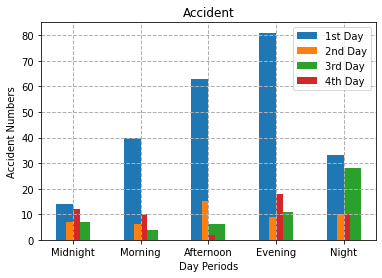

In [118]:
plot_holiday_periods(accident_day_periods(christmast_df,"1st_Day"),
                     accident_day_periods(christmast_df,"2nd_Day"),
                     accident_day_periods(christmast_df,"3rd_Day"),
                     accident_day_periods(christmast_df,"4th_Day"))

## Holiday Accident Rates by Day Periods

In [119]:
periods=["Midnight","Morning","Afternoon","Evening","Night"]
df = pd.DataFrame(hp, columns =periods, dtype = float)
df["Holiday"]=["Independence_Day","Christmast"]
df["Total"]=df["Midnight"]+df["Morning"]+df["Afternoon"]+df["Evening"]+df["Night"]


df["Midnight Rate"]=(df["Midnight"]/df["Total"])*100
df["Morning Rate"]=(df["Morning"]/df["Total"])*100
df["Afternoon Rate"]=(df["Afternoon"]/df["Total"])*100
df["Evening Rate"]=(df["Evening"]/df["Total"])*100
df["Night Rate"]=(df["Night"]/df["Total"])*100


df=df[["Holiday","Midnight Rate","Morning Rate","Afternoon Rate","Evening Rate","Night Rate","Total"]]
df

,Holiday,Midnight Rate,Morning Rate,Afternoon Rate,Evening Rate,Night Rate,Total
0,Independence_Day,16.932907,20.447284,28.115016,17.571885,16.932907,313.0
1,Christmast,10.362694,15.544041,22.279793,30.829016,20.984456,386.0


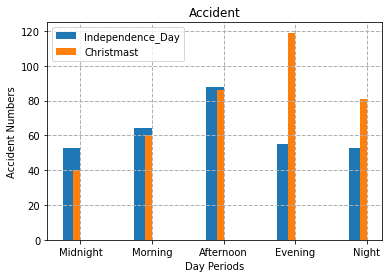

In [120]:
plt.bar([a for a in periods], hp[0], width= -0.25, label = 'Independence_Day', align='edge')
plt.bar([a for a in periods], hp[1], width= -0.10, label = 'Christmast', align='edge')

plt.title('Accident')
plt.xlabel('Day Periods')
plt.ylabel('Accident Numbers')
plt.legend(loc='upper left')
plt.xticks(periods)

plt.grid(True, linewidth= 1, linestyle="--")

## Holiday Accident Rates by Day Numbers

In [121]:
kp=[]
day_numbers=["1st_Day","2nd_Day","3rd_Day","4th_day"]

In [122]:
kp.append(df_int["Total"].tolist())

In [123]:
kp.append(df_ch["Total"])

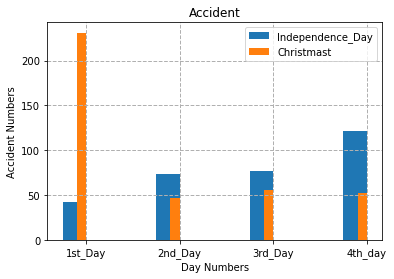

In [124]:
plt.bar([a for a in day_numbers], kp[0], width= -0.25, label = 'Independence_Day', align='edge')
plt.bar([a for a in day_numbers], kp[1], width= -0.10, label = 'Christmast', align='edge')

plt.title('Accident')
plt.xlabel('Day Numbers')
plt.ylabel('Accident Numbers')
plt.legend(loc='upper right')
plt.xticks(day_numbers)

plt.grid(True, linewidth= 1, linestyle="--")

## Accident Number versus Temperature

In [125]:
def temp_accident(holiday_df, nth_Day):
    t_df=holiday_df.loc[holiday_df["Day_Number"]==nth_Day,["City","Temperature"]].groupby(["City"]).mean()
    t_df=t_df.reset_index()
    t_df=t_df.sort_values(by="City",ascending=True)
    
    a_df=holiday_df.loc[holiday_df["Day_Number"]==nth_Day,["City","ID"]].groupby(["City"]).count()
    a_df=a_df.reset_index()
    a_df=a_df.sort_values(by="City",ascending=True)
    
    ta_df=pd.merge(t_df,a_df,on=["City"],how="inner").dropna()
    ta_df=ta_df.sort_values(by="Temperature",ascending=False)
    return ta_df

In [126]:
def lineplot_temp_accident(temp1_accident_df,temp2_accident_df,temp3_accident_df,temp4_accident_df):
    fig, ax = plt.subplots(figsize=(50, 8))
    
    temp=[30,35,40,45,50,55]
    acc=[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35]
    
    temp1= temp1_accident_df['Temperature'].tolist()
    acc1= temp1_accident_df['ID'].tolist()
    
    temp2=temp2_accident_df['Temperature'].tolist()
    acc2= temp2_accident_df['ID'].tolist()
    
    temp3=temp3_accident_df['Temperature'].tolist()
    acc3= temp3_accident_df['ID'].tolist()
    
    temp4=temp4_accident_df['Temperature'].tolist()
    acc4= temp4_accident_df['ID'].tolist()
    
    plt.plot(temp1,acc1,color = 'blue', label = '1st_Day')
    plt.plot(temp2,acc2,color='green', label = '2nd_Day')
    plt.plot(temp3,acc3,color='orange', label = '3rd_Day')
    plt.plot(temp4,acc4,color='red',label = '4th_Day')
    plt.xlabel('Average Temperature')
    plt.ylabel('Accident Numbers')
    plt.xticks(temp)
    plt.title('Accident Numbers depending on Average Temperature of Cities')
    plt.yticks(acc)
    plt.legend(loc='upper right')
    plt.grid(True, linewidth= 1, linestyle="--")

    return plt.show()

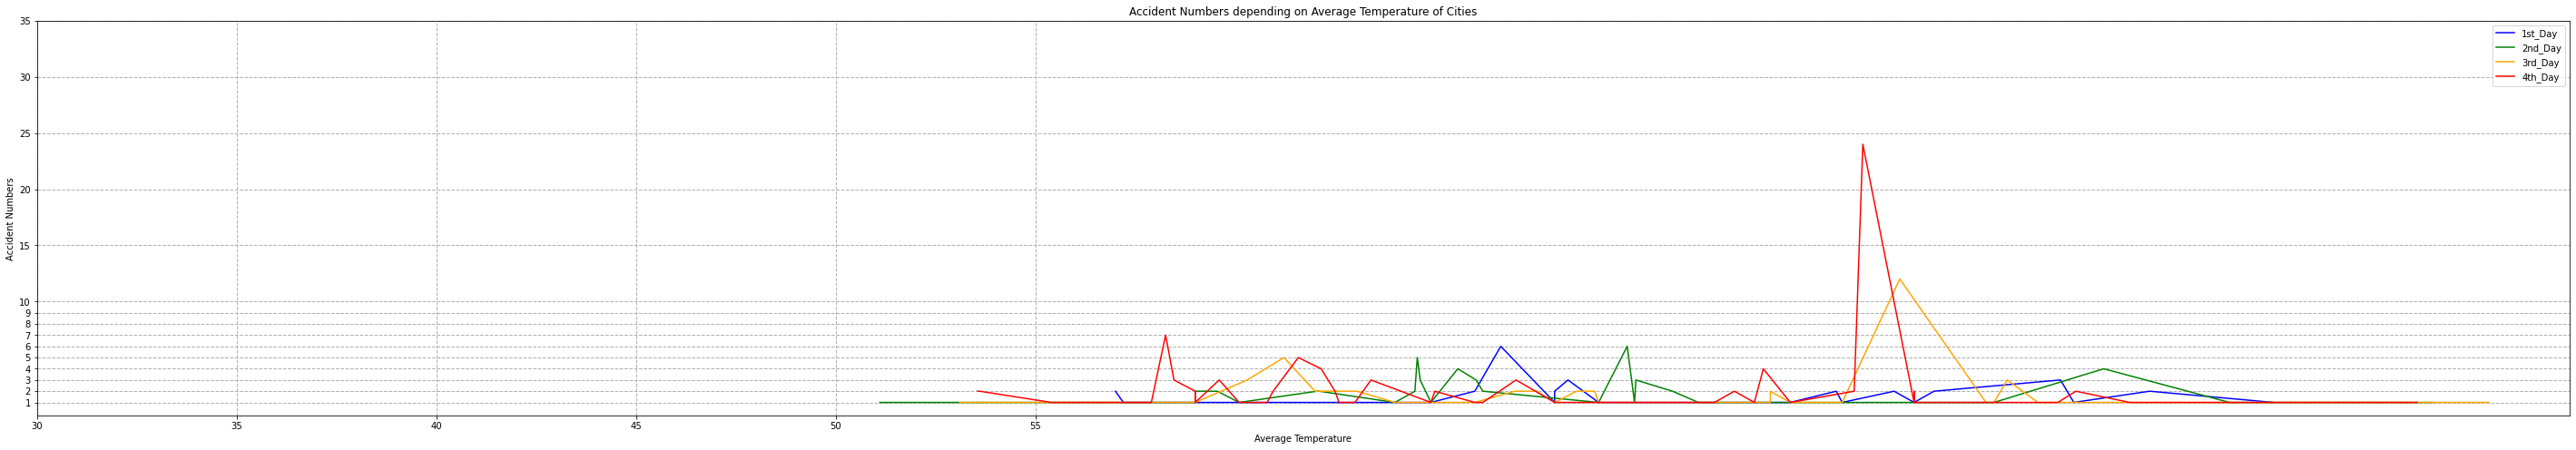

In [127]:
lineplot_temp_accident(temp_accident(independence_df,"1st_Day"),
                       temp_accident(independence_df,"2nd_Day"),
                       temp_accident(independence_df,"3rd_Day"),
                       temp_accident(independence_df,"4th_Day") 
                      )

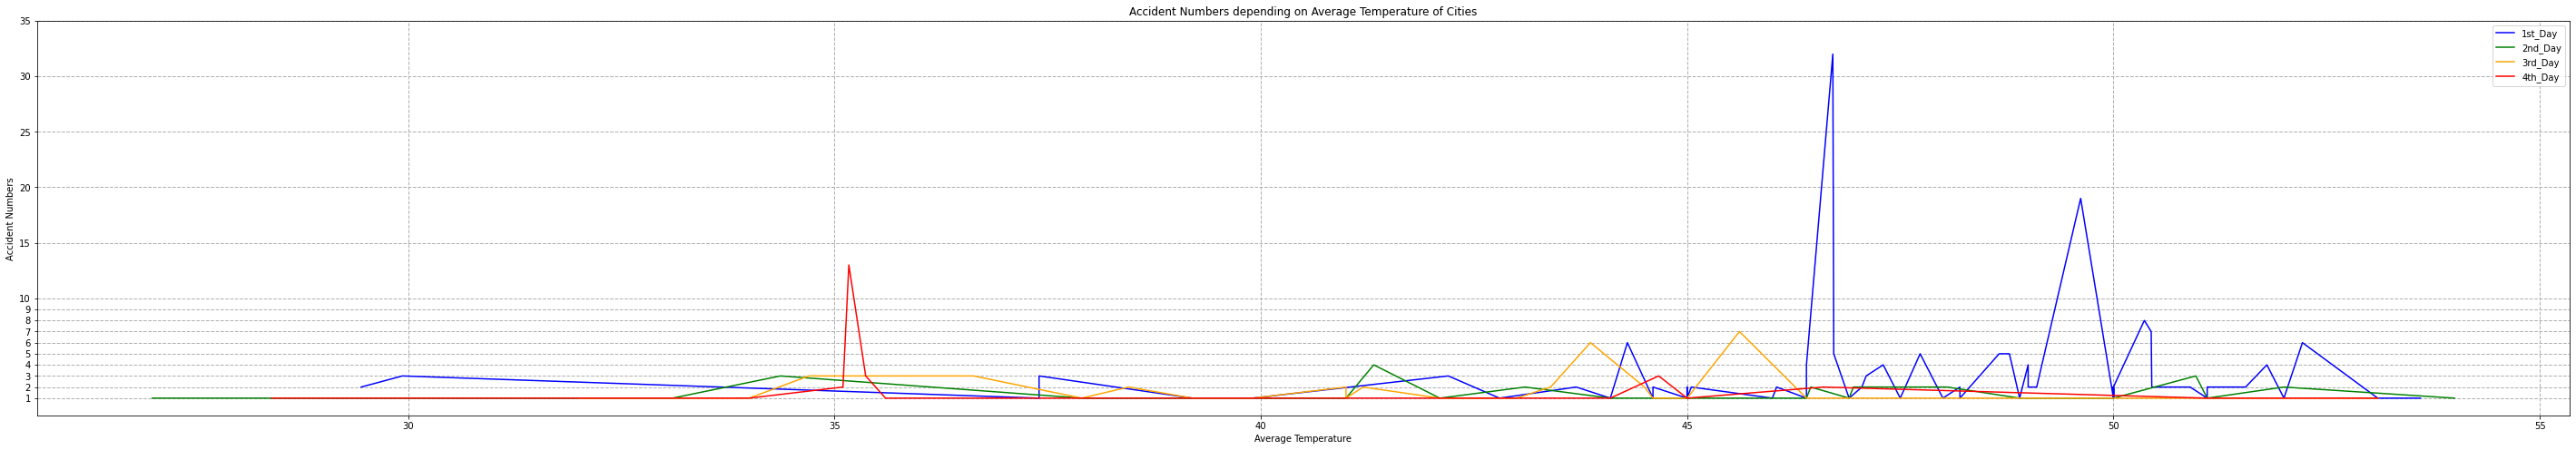

In [128]:
lineplot_temp_accident(temp_accident(christmast_df,"1st_Day"),
                       temp_accident(christmast_df,"2nd_Day"),
                       temp_accident(christmast_df,"3rd_Day"),
                       temp_accident(christmast_df,"4th_Day") 
                      )

## The city where biggest number of accident

In [129]:
def temp_accident(holiday_df, nth_Day):
    t_df=christmast_df.loc[christmast_df["Day_Number"]==nth_Day,["City","Temperature"]].groupby(["City"]).mean()
    t_df=t_df.reset_index()
    t_df=t_df.sort_values(by="City",ascending=True)
    
    a_df=christmast_df.loc[christmast_df["Day_Number"]==nth_Day,["City","ID"]].groupby(["City"]).count()
    a_df=a_df.reset_index()
    a_df=a_df.sort_values(by="City",ascending=True)
    
    ta_df=pd.merge(t_df,a_df,on=["City"],how="inner").dropna()
    ta_df=ta_df.sort_values(by="ID",ascending=False)
    return ta_df

In [130]:
d4_independence=temp_accident(independence_df, "4th_Day")
d4_independence.head(10)

,City,Temperature,ID
25,Sacramento,35.169231,13
26,San Francisco,44.666667,3
30,Tracy,35.366667,3
11,Lathrop,35.100000,2
18,Oakland,46.600000,2
24,Ripon,39.000000,1
20,Pinole,39.900000,1
21,Pleasanton,36.000000,1
22,Richmond,39.000000,1
23,Rio Linda,42.800000,1


In [131]:
d1_christmas=temp_accident(christmast_df, "1st_Day")
d1_christmas.head(10)

,City,Temperature,ID
70,Sacramento,46.709375,32
74,San Jose,49.615789,19
54,Oakland,50.362500,8
73,San Francisco,50.442857,7
12,Castro Valley,52.216667,6
81,Santa Rosa,44.300000,6
92,Tracy,48.780000,5
25,Fairfield,46.720000,5
97,Walnut Creek,47.733333,5
43,Los Gatos,48.660000,5
